### Import Libraries

In [8]:
%matplotlib inline
import numpy as np
import sys
import nibabel as nib
from nilearn import plotting

### Download Data

In [5]:
! ./download-data.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 28.4M  100 28.4M    0     0  4837k      0  0:00:06  0:00:06 --:--:-- 7318k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   213  100   213    0     0     71      0  0:00:03  0:00:02  0:00:01   463
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4208k  100 4208k    0     0  2397k      0  0:00:01  0:00:01 --:--:-- 6514k
  % Total    % Received % Xferd  Average Speed   Tim

### Run Searchlight SRM

In [10]:
! mpirun -n 16 python3 searchlight_srm_example.py

[[[None None None None None None None None None None]
  [None None None None None None None None None None]
  [None None None None None None None None None None]
  [None None None None None None None None None None]
  [None None None None None None None None None None]
  [None None None None None None None None None None]
  [None None None None None None None None None None]
  [None None None None None None None None None None]
  [None None None None None None None None None None]
  [None None None None None None None None None None]]

 [[None None None None None None None None None None]
  [None 0.016393442622950821 0.051229508196721313 0.090163934426229497
   0.13797814207650275 0.10655737704918032 0.040300546448087428
   0.021174863387978141 0.011612021857923498 None]
  [None 0.017076502732240439 0.03961748633879781 0.084699453551912565
   0.12841530054644809 0.13251366120218577 0.043715846994535519
   0.025956284153005466 0.019808743169398905 None]
  [None 0.016393442622950821 0.03

### Get Whole Brain Mask

In [11]:
wbmask_fname = 'data/MNI152_T1_3mm_brain_mask.nii'
mask = nib.load(wbmask_fname)
affine = mask.affine
mask = mask.get_data()
zeromaskidx = mask <= 0

### Get Accuracy Map

In [12]:
acc_path = 'data/searchlight_srm_tsm_acc.npz'
acc_file = np.load(acc_path)
acc_map = acc_file['acc']

### Map to MNI Space

In [13]:
# Parameters
ds = 6 #the dataset we provided was downsampled by 6
mni_shape = [61,73,61]
min_size  = [1,7,0] # min and max of nonzeros
max_size  = [59,65,58]
acc_mni = np.zeros_like(mask)
# mapping (make sure length of each dimension is a multiple of 'ds')
acc_mni[min_size[0]-1:max_size[0]+1, min_size[1]-1:max_size[1]+1, min_size[2]:max_size[2]+2] = \
acc_map.repeat(ds, axis=0).repeat(ds, axis=1).repeat(ds, axis=2)

# if no downsampling
#acc_mni[min_size[0]:max_size[0], min_size[1]:max_size[1], min_size[2]:max_size[2]] = acc_map

# mask
acc_mni[zeromaskidx] = 0

### Save accuracy map

In [14]:
out_path = 'data/searchlight_srm_tsm_acc_mni.nii'
acc_img = nib.Nifti1Image(acc_mni, affine)
nib.save(acc_img, out_path)

### Visualize Results

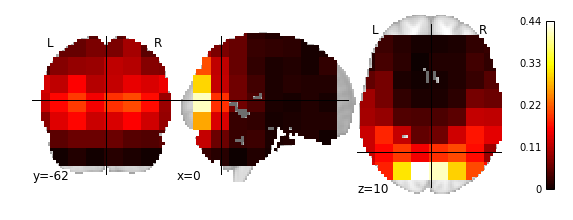

In [15]:
plotting.plot_stat_map(out_path)